# MELTS
  
Versions of MELTS implemented are:  
- MELTS v. 1.0.2 ➞ (rhyolite-MELTS, Gualda et al., 2012)  
- MELTS v. 1.1.0 ➞ (rhyolite-MELTS + new CO<sub>2</sub>, works at the ternary minimum)  
- MELTS v. 1.2.0 ➞ (rhyolite-MELTS + new H<sub>2</sub>O + new CO<sub>2</sub>)  
- pMELTS v. 5.6.1

## Initialize tools and packages that are required to execute this notebook.

In [ ]:
from thermoengine import equilibrate
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Create a MELTS v 1.0.2 instance.
Rhyolite-MELTS version 1.0.2 is the default model.

In [ ]:
melts = equilibrate.MELTSmodel(version="5.6.1")

### Optional: Generate some information about the implemented model.

In [ ]:
oxides = melts.get_oxide_names()
phases = melts.get_phase_names()
#print (oxides)
#print (phases)

## Required: Input initial composition of the system (liquid), in wt% or grams of oxides. 
Mid-Atlantic ridge MORB composition

In [ ]:
#Fe2O3 Calc 
def Fe2O3Calc(FeOwt, Fe3FeT_ratio):
    FeO = FeOwt * (1 - Fe3FeT_ratio)
    Fe2O3 = FeOwt * (Fe3FeT_ratio) * 1.11 # 1.11 converts for molar mass diferences
    return FeO, Fe2O3

In [ ]:
# Workman and Hart Depleted MORB Mantle
# FeO, Fe2O3 = Fe2O3Calc(8.18,0.04)
FeO, Fe2O3 = Fe2O3Calc(8.18,0.1)

feasible = melts.set_bulk_composition({'SiO2':  44.7, 
                                       'TiO2':   0.13, 
                                       'Al2O3':  3.98, 
                                       'Fe2O3':  Fe2O3,#  # Need to calcuate ferric iron for models to run properly Assumed 4%
                                       'Cr2O3':  0.57, 
                                       'FeO':    FeO, # Total Feo 8.18 wt% 
                                       'MnO':    0.0, #0.13 Excluded for modeling
                                       'MgO':   38.73, 
                                       'NiO':    0.0, #0.24 Excluded 
                                       'CoO':    0.0,
                                       'CaO':    3.17, 
                                       'Na2O':   0.28, 
                                       'K2O':    0.006, #0.006
                                       'P2O5':   0.0, # 0.019
                                       'H2O':    0.011, }) # 0.011 Water included 110 ppm

## Optional: Suppress phases that are not required in the simulation.

In [ ]:
b = melts.get_phase_inclusion_status()
melts.set_phase_inclusion_status({'Actinolite':False, 'Aegirine':False, \
                                  'Aenigmatite':False, 'Akermanite':False, 'Andalusite':False, \
                                  'Anthophyllite':False, 'Apatite':True, 'Biotite':False, 'Chromite':False, \
                                  'Coesite':False, 'Corundum':False, 'Cristobalite':False, 'Cummingtonite':False, \
                                  'Fayalite':False, 'Forsterite':False, 'Gehlenite':False, 'Hematite':False, \
                                  'Hornblende':False, 'Ilmenite':False, 'Ilmenite ss':False, 'Kalsilite':False, \
                                  'Kalsilite ss':False, 'Kyanite':False, 'Leucite':False, 'Lime':False, \
                                  'Liquid Alloy':False, 'Magnetite':False, 'Melilite':False, 'Muscovite':False, \
                                  'Nepheline':False, 'Nepheline ss':False, 'OrthoOxide':False, 'Panunzite':False, \
                                  'Periclase':False, 'Perovskite':False, 'Phlogopite':False, 'Quartz':False, \
                                  'Rutile':False, 'Sanidine':False, 'Sillimanite':False, 'Solid Alloy':False, \
                                  'Sphene':False, 'Tridymite':False, 'Whitlockite':False})

a = melts.get_phase_inclusion_status()
for phase in b.keys():
    if b[phase] != a[phase]:
        print ("{0:<15s} Before: {1:<5s} After: {2:<5s}".format(phase, repr(b[phase]), repr(a[phase])))

## Compute the equilibrium state at some specified T (°C) and P (MPa).
Print status of the calculation.

In [ ]:
output = melts.equilibrate_tp(1410.0,2000.0, initialize=True) # 1410 at 2GPa is about the temp at caclulated at calculated for an adiabat at mantle potential temperature of 1377. After Calcs by Katsura 2022
(status, t, p, xmlout) = output[0]
print (status, t, p)

### Summary output of equilibrium state ...

In [ ]:
melts.output_summary(xmlout)
dict = melts.get_dictionary_of_affinities(xmlout, sort=True)
for phase in dict:
    (affinity, formulae) = dict[phase]
    if affinity < 10000.0:
        print ("{0:<20s} {1:10.2f} {2:<60s}".format(phase, affinity, formulae))

### Obtain default set of fractionation coefficients (retain liquids, fractionate solids and fluids)

In [ ]:
#frac_coeff = melts.get_dictionary_of_default_fractionation_coefficients(fracLiq=False, fracSolid=True, fracFluid=True, fracCoeff=0.01)
frac_coeff = melts.get_dictionary_of_default_fractionation_coefficients(fracLiq=True, fracSolid=False, fracFluid=False, fracCoeff=.90)
print (frac_coeff)

In [19]:
s = melts.get_property_of_phase(xmlout,'System', 'Entropy')
print ("{0:<20s} {1:13.6e} {2:<10s}".format('Entropy', s, melts.get_units_of_property('Entropy')))
output = melts.equilibrate_sp(s, p, initialize=True)
(status, t, p, xmlout) = output[0]
melts.output_summary(xmlout)

Entropy               2.551199e+02 J/K       
T (°C)      1400.00
P (MPa)     3000.00
Orthopyroxene    19.5478 (g)  Na0.02Ca0.07Fe''0.14Mg1.68Fe'''0.03Ti0.01Al0.13Si1.92O6     
Spinel            2.0667 (g)  Fe''0.29Mg0.73Fe'''0.38Al0.94Cr0.65Ti0.02O4                 
Garnet            8.4339 (g)  (Ca0.16Fe''0.14Mg0.70)3Al2Si3O12                            
Olivine          55.5499 (g)  (Ca0.00Mg0.91Fe''0.09Mn0.00Co0.00Ni0.00)2SiO4               
Liquid            0.3863 (g)  wt%:SiO2 40.93 TiO2  1.05 Al2O3  9.16 Fe2O3  3.14 Cr2O3  0.19 FeO 10.35 MnO  0.00 MgO
                                  17.87 NiO  0.00 CoO  0.00 CaO  4.09 Na2O  8.82 K2O  1.55 P2O5  0.00 H2O  2.85
Augite           13.8623 (g)  Na0.10Ca0.61Fe''0.10Mg1.01Fe'''0.06Ti0.01Al0.22Si1.90O6     


## Run the sequence of calculations along a T, P=constant path:
Output is sent to an Excel file and plotted in the notebook

success, Minimal energy computed.  1399.75  2950.00
success, Minimal energy computed.  1399.50  2900.00
failure, Molar redistribution was not successful (liquid).  1399.25  2850.00
failure, Molar redistribution was not successful (liquid).  1399.00  2800.00
failure, Molar redistribution was not successful (liquid).  1398.75  2750.00
failure, Molar redistribution was not successful (liquid).  1398.50  2700.00
failure, Quadratic algorithm did not converge in 100 iterations (rNorm: 0.150423).  1398.25  2650.00
failure, Molar redistribution was not successful (liquid).  1398.00  2600.00
failure, Molar redistribution was not successful (liquid).  1397.75  2550.00
failure, Molar redistribution was not successful (liquid).  1397.50  2500.00
failure, Molar redistribution was not successful (liquid).  1397.25  2450.00
failure, Molar redistribution was not successful (liquid).  1397.00  2400.00
failure, Molar redistribution was not successful (liquid).  1396.75  2350.00
failure, Molar redistribu

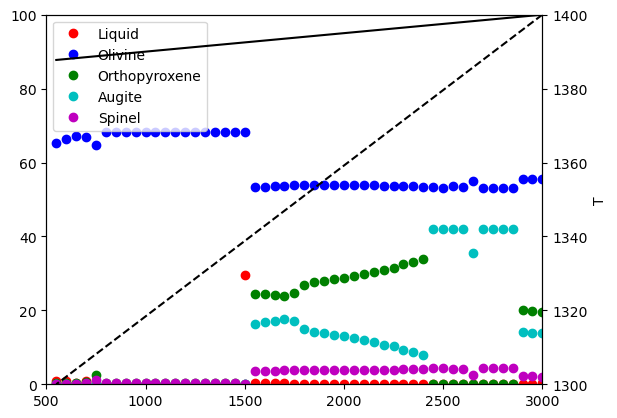

In [20]:
number_of_steps = 50
t_increment_of_steps = -0.250
p_increment_of_steps = -50.0

plotPhases = ['Liquid', 'Olivine', 'Orthopyroxene', 'Augite', 'Spinel']
# matplotlib colors b : blue, g : green, r : red, c : cyan, m : magenta, y : yellow, k : black, w : white.
plotColors = [ 'ro', 'bo', 'go', 'co', 'mo']

wb = melts.start_excel_workbook_with_sheet_name(sheetName="Summary")
melts.update_excel_workbook(wb, xmlout)

n = len(plotPhases)
xPlot = np.zeros(number_of_steps)
yPlot = np.zeros((n, number_of_steps))
y2Plot = np.linspace(t, t-100.0, number_of_steps)
y3Plot = np.linspace(t, t-100.0, number_of_steps)
xPlot[0] = p
for i in range (0, n):
    yPlot[i][0] = melts.get_property_of_phase(xmlout, plotPhases[i])
y2Plot[0] = t

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([min(p, p+p_increment_of_steps*number_of_steps), max(p, p+p_increment_of_steps*number_of_steps)])
ax.set_ylim([0., 100.])
ax2 = ax.twinx()
ax2.set_ylabel('T', color='k')
ax2.set_ylim([t-100, t])

graphs = []
for i in range (0, n):
    graphs.append(ax.plot(xPlot, yPlot[i], plotColors[i]))
graphs.append(ax2.plot(xPlot, y2Plot, 'k-'))
graphs.append(ax2.plot(xPlot, y3Plot, 'k--'))
handle = []
for (graph,) in graphs:
    handle.append(graph)
ax.legend(handle, plotPhases, loc='upper left')


for i in range (1, number_of_steps):
    # fractionate phases
    frac_output = melts.fractionate_phases(xmlout, frac_coeff)
    output = melts.equilibrate_tp(t+t_increment_of_steps, p+p_increment_of_steps, initialize=True)
    (status, t, p, xmlout) = output[0]
    print ("{0:<30s} {1:8.2f} {2:8.2f}".format(status, t, p))
    xPlot[i] = p
    for j in range (0, n):
        yPlot[j][i] = melts.get_property_of_phase(xmlout, plotPhases[j])
    y2Plot[i] = t
    j = 0
    for (graph,) in graphs:
        graph.set_xdata(xPlot)
        if j < n:
            graph.set_ydata(yPlot[j])
        elif j == n:
            graph.set_ydata(y2Plot)
        j = j + 1
    fig.canvas.draw()
    melts.update_excel_workbook(wb, xmlout)

melts.write_excel_workbook(wb, "PMelts_DMM_FractionalMelting_summary.xlsx")

In [11]:
'oxide_wt'
print('Liquid composition in mole fraction:')
out = melts.get_composition_of_phase(xmlout,phase_name='Liquid',mode='oxide_wt')
for key,value in out.items():
    print ("{0:<15s} {1:13.6e}".format(key, value))

Liquid composition in mole fraction:
Cr2O3            1.000000e+02


In [13]:
out


{'Cr2O3': 100.0}

In [12]:
melts.set_bulk_composition(out)

In [14]:
'oxide_wt'
print('Liquid composition in mole fraction:')
out = melts.get_composition_of_phase(xmlout,phase_name='Solids',mode='oxide_wt')
for key,value in out.items():
    print ("{0:<15s} {1:13.6e}".format(key, value))

Liquid composition in mole fraction:
